# IRIS DATASET CLASSIFICATION PROBLEM_TASK 1

## IMPORT PACKAGES AND DATA 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model  import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
df = pd.read_csv("/content/IRIS_TASK_1.csv")

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df["species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

### UNIVARIATE ANALYSIS

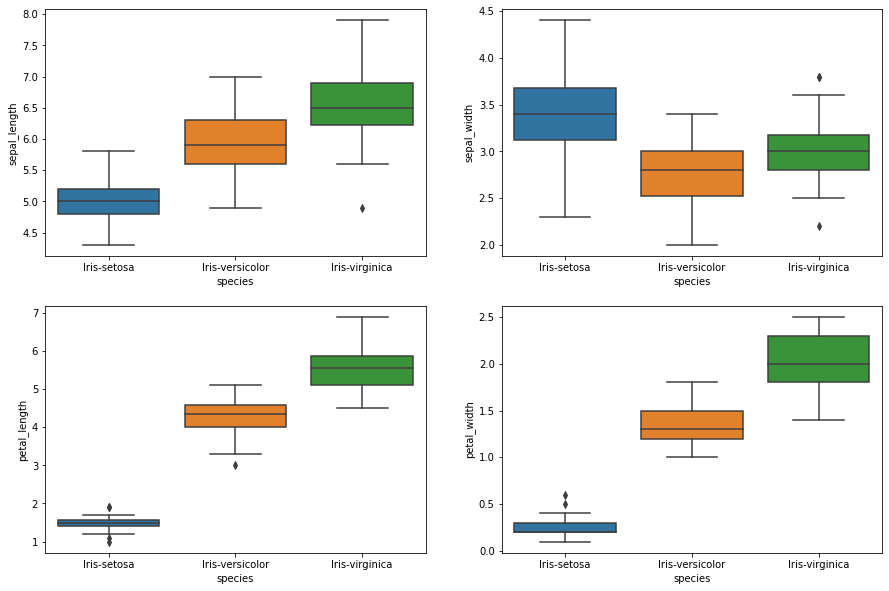

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(x = "species",y = "sepal_length",data = df,ax = ax[0,0])
sns.boxplot(x = "species",y = "sepal_width",data = df,ax = ax[0,1])
sns.boxplot(x = "species",y = "petal_length",data = df,ax = ax[1,0])
sns.boxplot(x = "species",y = "petal_width",data = df,ax = ax[1,1])

### MULTIVARIATE ANALYSIS

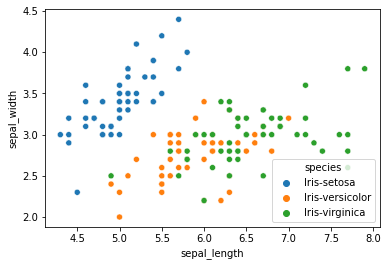

In [10]:
sns.scatterplot(x= "sepal_length",y = "sepal_width",hue = "species",data =df)

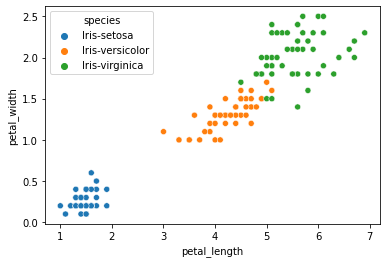

In [11]:
sns.scatterplot(x= "petal_length",y = "petal_width",hue = "species",data =df)

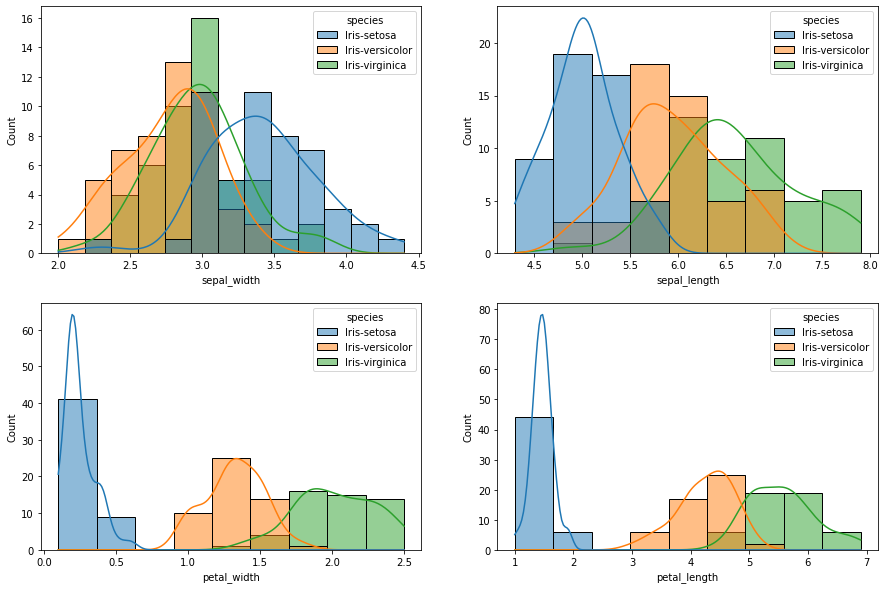

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
sns.histplot(ax = ax[0,0],data=df,x ='sepal_width',hue='species',kde = True)
sns.histplot(ax = ax[0,1],data=df,x ='sepal_length',hue='species',kde=True)
sns.histplot(ax = ax[1,0],data=df,x ='petal_width',hue='species',kde=True)
sns.histplot(ax = ax[1,1],data=df,x ='petal_length',hue='species',kde=True)

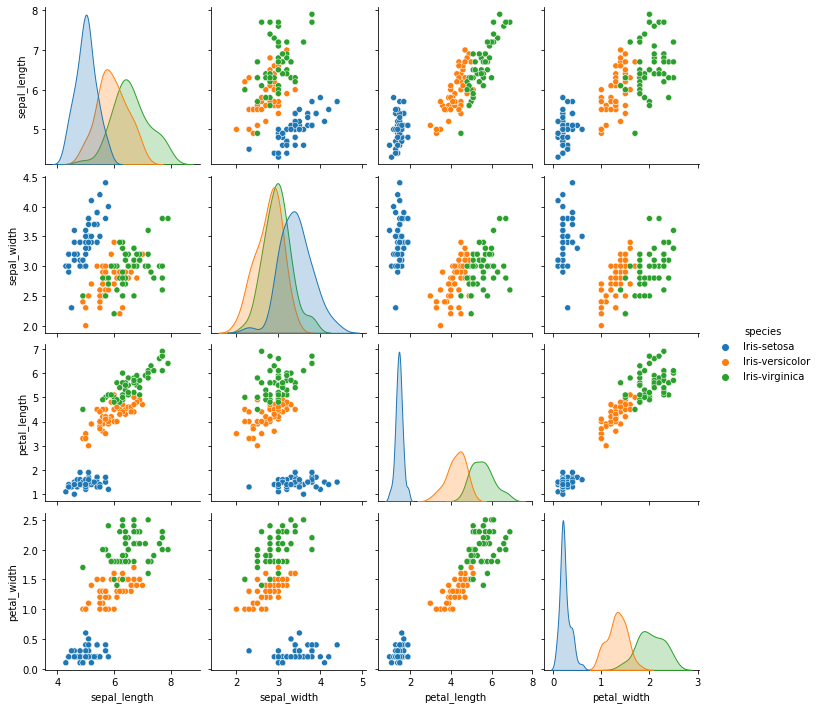

In [13]:
sns.pairplot(df,hue = "species")

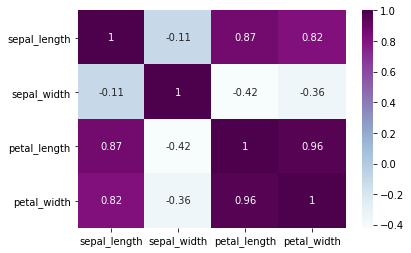

In [14]:
sns.heatmap(df.corr(),annot=True,cmap = 'BuPu')

## TRAIN TEST SPLIT

In [15]:
feature = df.drop('species', axis=1)
outcome = df['species']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(feature, outcome, random_state=445566,test_size =.33 )

## MODEL BUILDING

### Logistic Regression

In [89]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
print("\n")
y_predicted = model1.predict(x_test)
print("Logistic Reg Accuracy:", accuracy_score(y_test, y_predicted))
print("\n")
conf_matrix = confusion_matrix(y_test,y_predicted)
print("Confusion Matrix: \n",conf_matrix)
print("\n")
class_report = classification_report(y_test,y_predicted)
print("Classification Report: \n",class_report)



Logistic Reg Accuracy: 0.98


Confusion Matrix: 
 [[17  0  0]
 [ 0 20  1]
 [ 0  0 12]]


Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        50
      macro avg       0.97      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



### KNN Classifier

In [91]:
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
print("\n")
y_predicted = model2.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_predicted))
print("\n")
conf_matrix = confusion_matrix(y_test,y_predicted)
print("Confusion Matrix: \n",conf_matrix)
print("\n")
class_report = classification_report(y_test,y_predicted)
print("Classification Report: \n",class_report)



KNN Accuracy: 0.96


Confusion Matrix: 
 [[17  0  0]
 [ 0 19  2]
 [ 0  0 12]]


Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.90      0.95        21
 Iris-virginica       0.86      1.00      0.92        12

       accuracy                           0.96        50
      macro avg       0.95      0.97      0.96        50
   weighted avg       0.97      0.96      0.96        50



### Decision Tree

In [93]:
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:

print("\n")
y_predicted = model3.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_predicted))
print("\n")
conf_matrix = confusion_matrix(y_test,y_predicted)
print("Confusion Matrix: \n",conf_matrix)
print("\n")
class_report = classification_report(y_test,y_predicted)
print("Classification Report: \n",class_report)



Decision Tree Accuracy: 0.98


Confusion Matrix: 
 [[17  0  0]
 [ 0 20  1]
 [ 0  0 12]]


Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        50
      macro avg       0.97      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



### Random Forest

In [95]:
model4 = DecisionTreeClassifier()
model4.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
print("\n")
y_predicted = model3.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_predicted))
print("\n")
conf_matrix = confusion_matrix(y_test,y_predicted)
print("Confusion Matrix: \n",conf_matrix)
print("\n")
class_report = classification_report(y_test,y_predicted)
print("Classification Report: \n",class_report)



Random Forest Accuracy: 0.98


Confusion Matrix: 
 [[17  0  0]
 [ 0 20  1]
 [ 0  0 12]]


Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        50
      macro avg       0.97      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

